<a href="https://colab.research.google.com/github/DetaErviana25/CODVEDA-PROPJECT/blob/main/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##REGESSION ANALYSIS ON IRIS DATA


In [1]:
# Analisis Regresi Dataset Iris
# ==============================

# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("="*60)
print("ANALISIS REGRESI DATASET IRIS")
print("="*60)

ANALISIS REGRESI DATASET IRIS


In [2]:
# 2. Load dataset
# Pastikan file iris.csv sudah di-upload di Google Colab
df = pd.read_csv("/content/1) iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
# Tampilkan 5 baris pertama dari data
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Tampilkan informasi dasar
print("\n" + "="*40)
print("INFORMASI DATASET")
print("="*40)
print(df.info())

print("\n" + "="*40)
print("STATISTIK DESKRIPTIF")
print("="*40)
print(df.describe())

print("\n" + "="*40)
print("DISTRIBUSI SPESIES")
print("="*40)
print(df['species'].value_counts())



INFORMASI DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

STATISTIK DESKRIPTIF
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.9000


🎨 Membuat visualisasi...


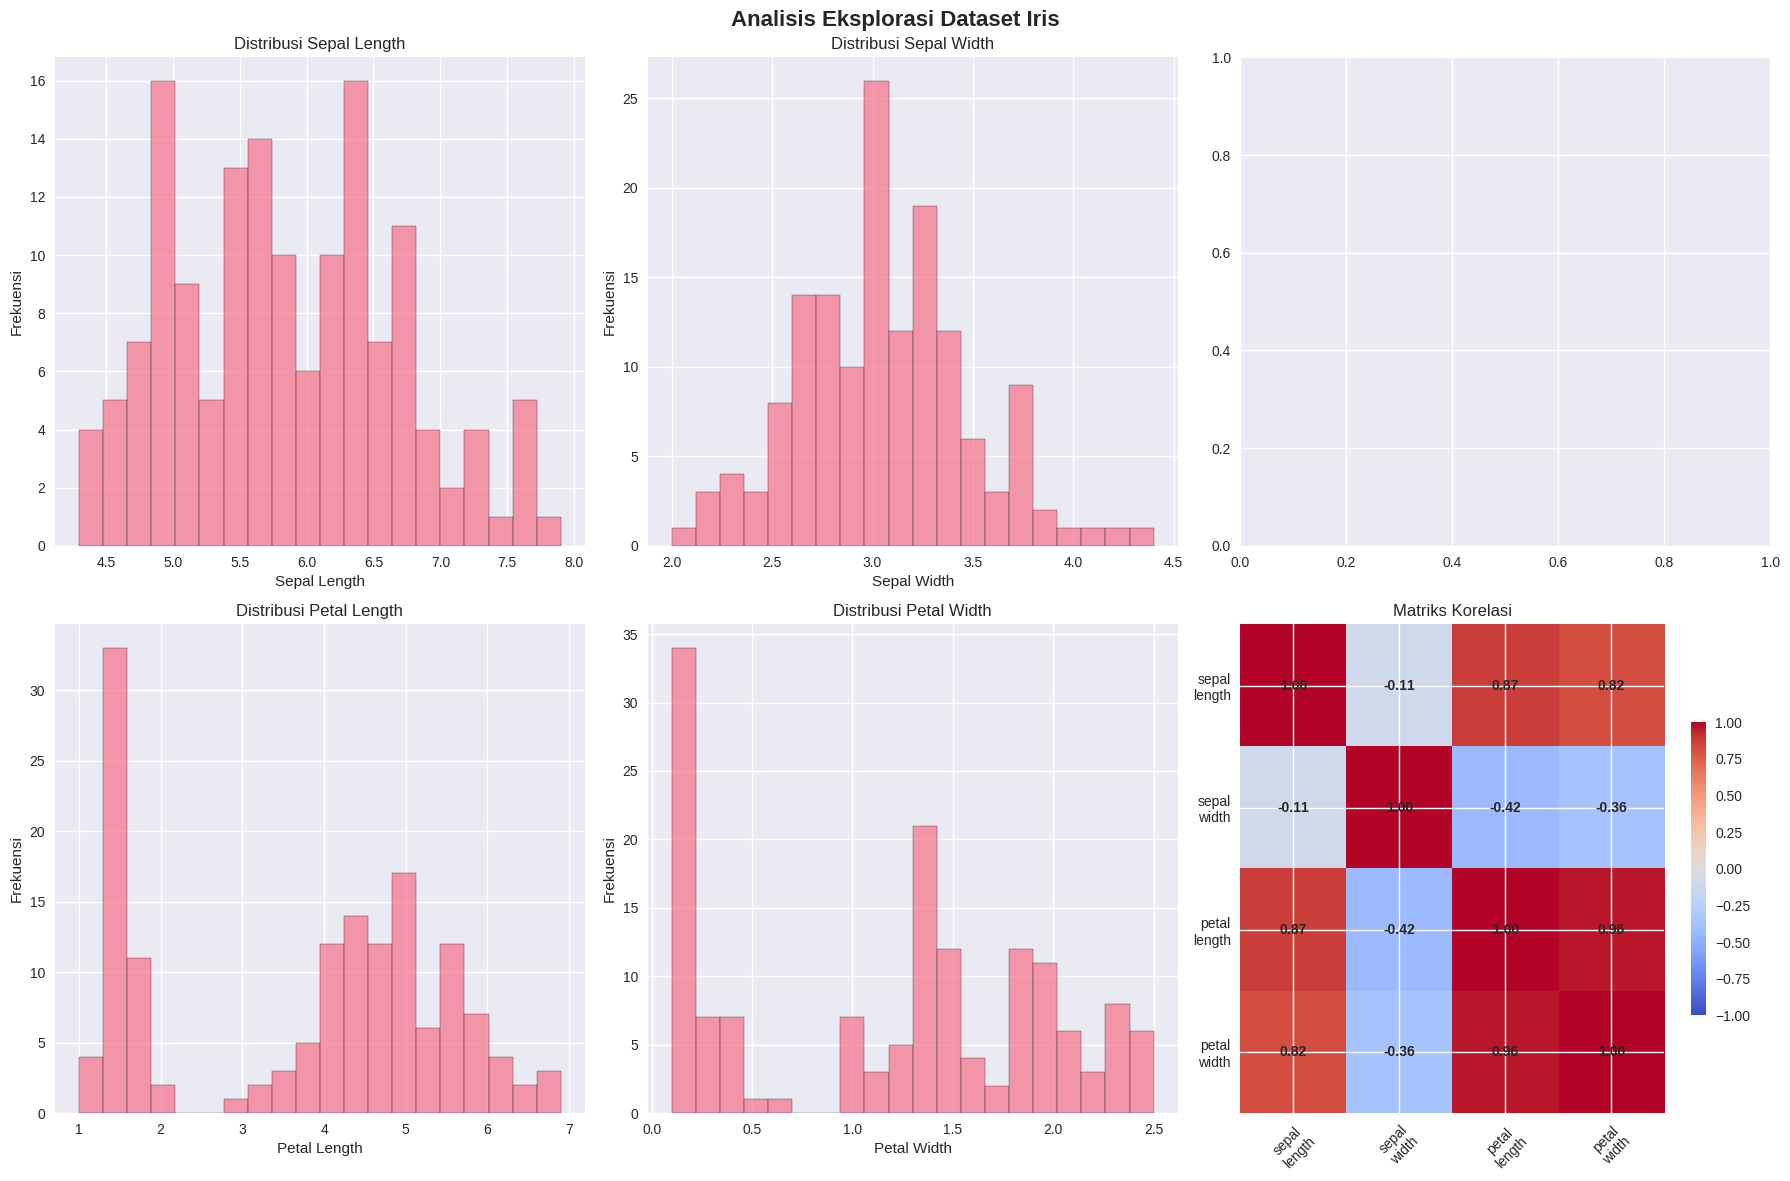

🔍 Membuat scatter plot matrix...


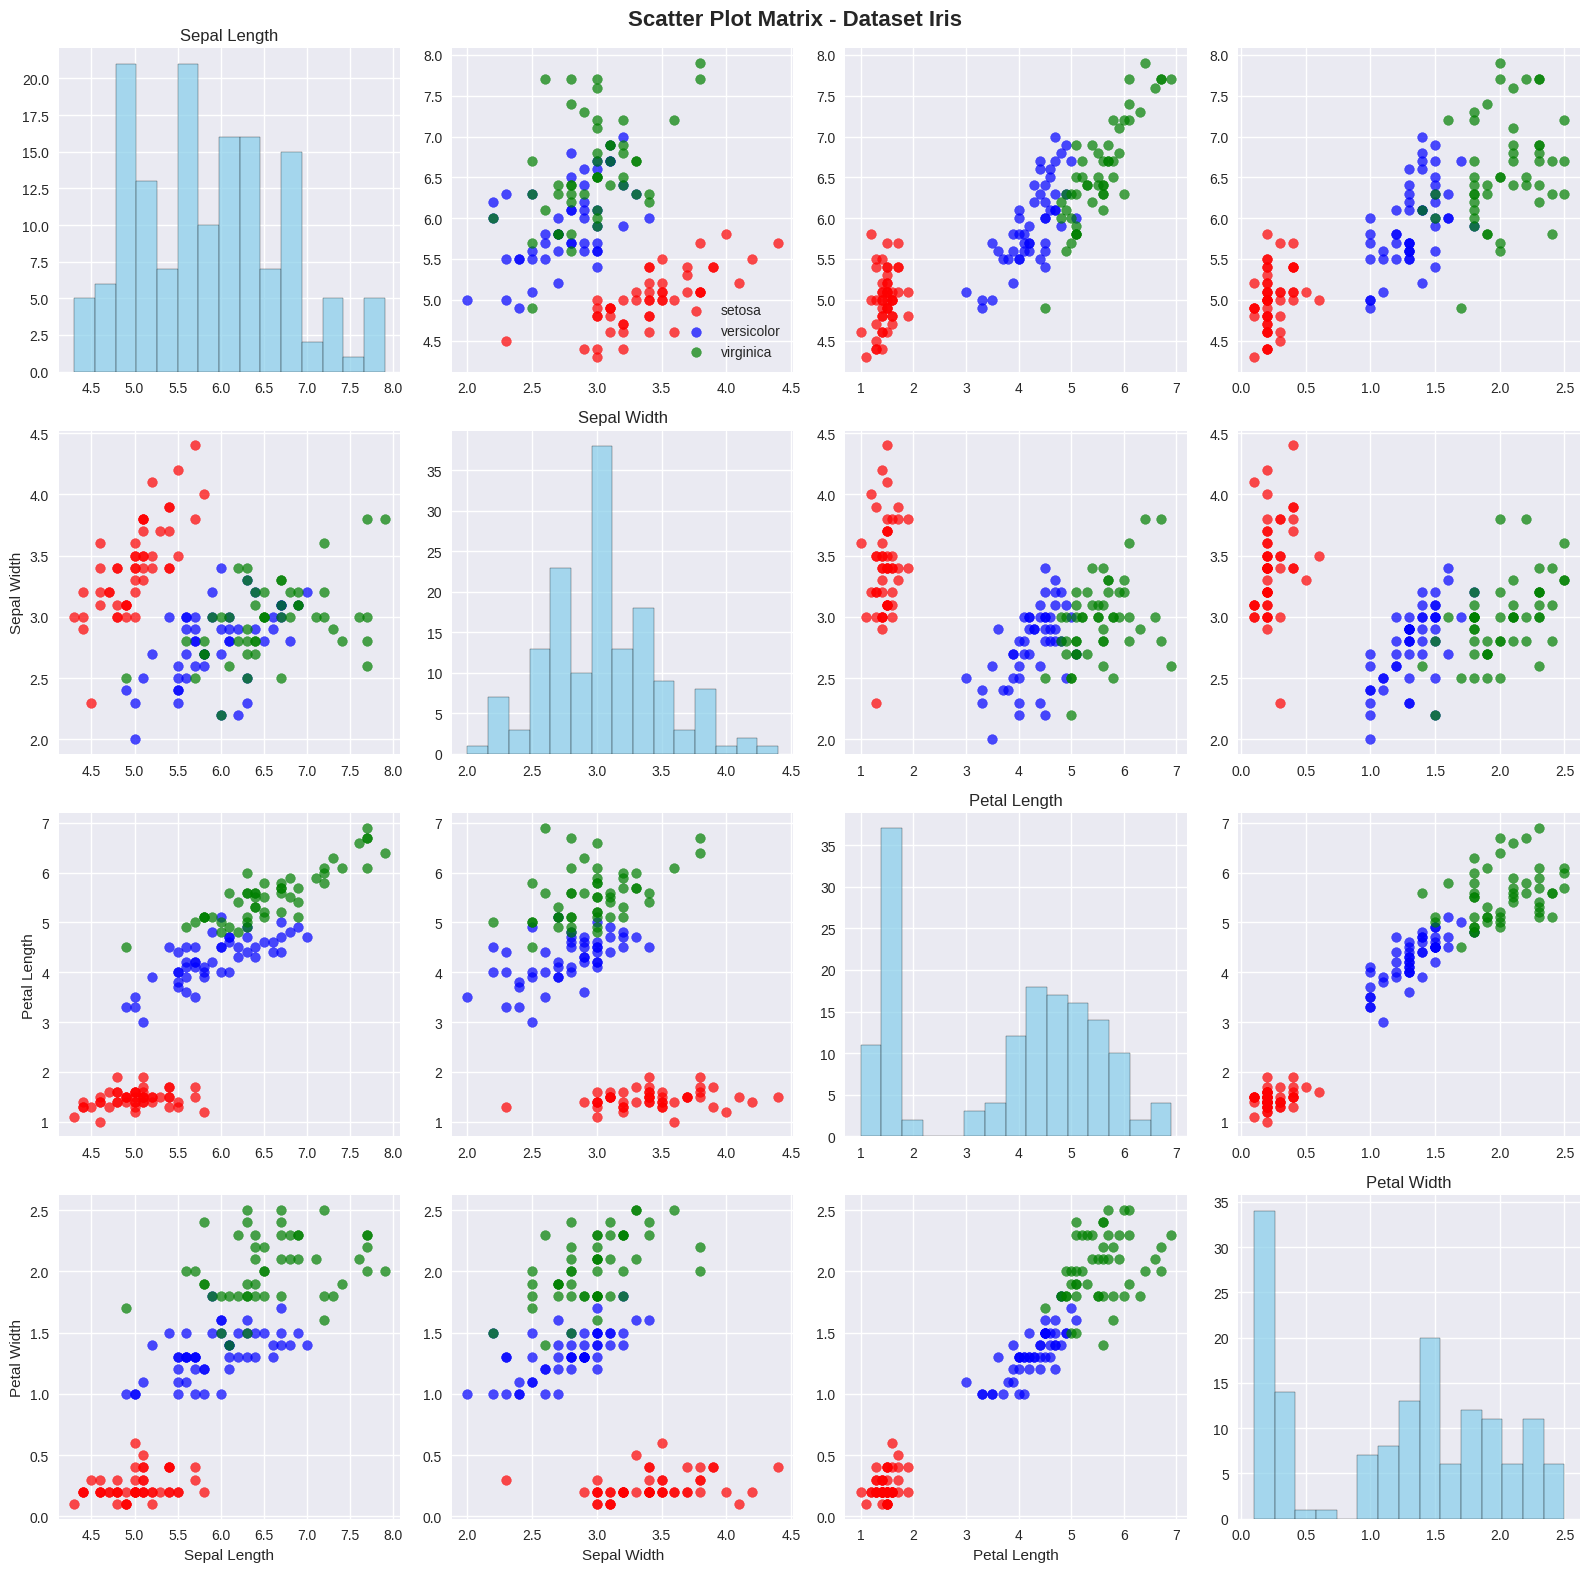

In [5]:
# 3. VISUALISASI DATA
# ===================

print("\n🎨 Membuat visualisasi...")

# Buat subplot
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Analisis Eksplorasi Dataset Iris', fontsize=16, fontweight='bold')

# Pairplot untuk melihat hubungan antar variabel
numerical_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Distribusi setiap variabel numerik
for i, col in enumerate(numerical_cols):
    row = i // 2
    col_idx = i % 2
    axes[row, col_idx].hist(df[col], bins=20, alpha=0.7, edgecolor='black')
    axes[row, col_idx].set_title(f'Distribusi {col.replace("_", " ").title()}')
    axes[row, col_idx].set_xlabel(col.replace("_", " ").title())
    axes[row, col_idx].set_ylabel('Frekuensi')

# Correlation heatmap
corr_matrix = df[numerical_cols].corr()
im = axes[1, 2].imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[1, 2].set_title('Matriks Korelasi')
axes[1, 2].set_xticks(range(len(numerical_cols)))
axes[1, 2].set_yticks(range(len(numerical_cols)))
axes[1, 2].set_xticklabels([col.replace('_', '\n') for col in numerical_cols], rotation=45)
axes[1, 2].set_yticklabels([col.replace('_', '\n') for col in numerical_cols])

# Tambahkan nilai korelasi pada heatmap
for i in range(len(numerical_cols)):
    for j in range(len(numerical_cols)):
        axes[1, 2].text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                       ha='center', va='center', fontweight='bold')

plt.colorbar(im, ax=axes[1, 2], shrink=0.6)
plt.tight_layout()
plt.show()

# Scatter plot matrix
print("🔍 Membuat scatter plot matrix...")
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle('Scatter Plot Matrix - Dataset Iris', fontsize=16, fontweight='bold')

for i, col1 in enumerate(numerical_cols):
    for j, col2 in enumerate(numerical_cols):
        if i == j:
            # Diagonal: histogram
            axes[i, j].hist(df[col1], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
            axes[i, j].set_title(f'{col1.replace("_", " ").title()}')
        else:
            # Off-diagonal: scatter plot colored by species
            species_unique = df['species'].unique()
            colors = ['red', 'blue', 'green']
            for k, species in enumerate(species_unique):
                species_data = df[df['species'] == species]
                axes[i, j].scatter(species_data[col2], species_data[col1],
                                 alpha=0.7, label=species, color=colors[k % len(colors)])

            if j == 0:
                axes[i, j].set_ylabel(col1.replace("_", " ").title())
            if i == 3:
                axes[i, j].set_xlabel(col2.replace("_", " ").title())

            if i == 0 and j == 1:
                axes[i, j].legend()

plt.tight_layout()
plt.show()


In [6]:
# 4. REGRESI LINEAR
# =================

print("\n" + "="*50)
print("1. REGRESI LINEAR - PREDIKSI PETAL LENGTH")
print("="*50)



1. REGRESI LINEAR - PREDIKSI PETAL LENGTH


In [7]:
# Siapkan data untuk regresi linear
X_linear = df[['sepal_length', 'sepal_width', 'petal_width']]
y_linear = df['petal_length']

In [8]:
# Split data
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(
    X_linear, y_linear, test_size=0.2, random_state=42)

In [9]:
# Train model
linear_model = LinearRegression()
linear_model.fit(X_train_lin, y_train_lin)

LinearRegression()

In [10]:
# Prediksi
y_pred_lin = linear_model.predict(X_test_lin)

In [11]:
# Evaluasi
mse_lin = mean_squared_error(y_test_lin, y_pred_lin)
r2_lin = r2_score(y_test_lin, y_pred_lin)

print(f"📈 Mean Squared Error: {mse_lin:.4f}")
print(f"📊 R² Score: {r2_lin:.4f}")
print(f"🎯 Root Mean Squared Error: {np.sqrt(mse_lin):.4f}")

📈 Mean Squared Error: 0.1299
📊 R² Score: 0.9604
🎯 Root Mean Squared Error: 0.3604


In [12]:
# Koefisien model
print(f"\n📋 Koefisien Regresi:")
for i, feature in enumerate(X_linear.columns):
    print(f"   {feature}: {linear_model.coef_[i]:.4f}")
print(f"   Intercept: {linear_model.intercept_:.4f}")


📋 Koefisien Regresi:
   sepal_length: 0.7242
   sepal_width: -0.6420
   petal_width: 1.4663
   Intercept: -0.2505


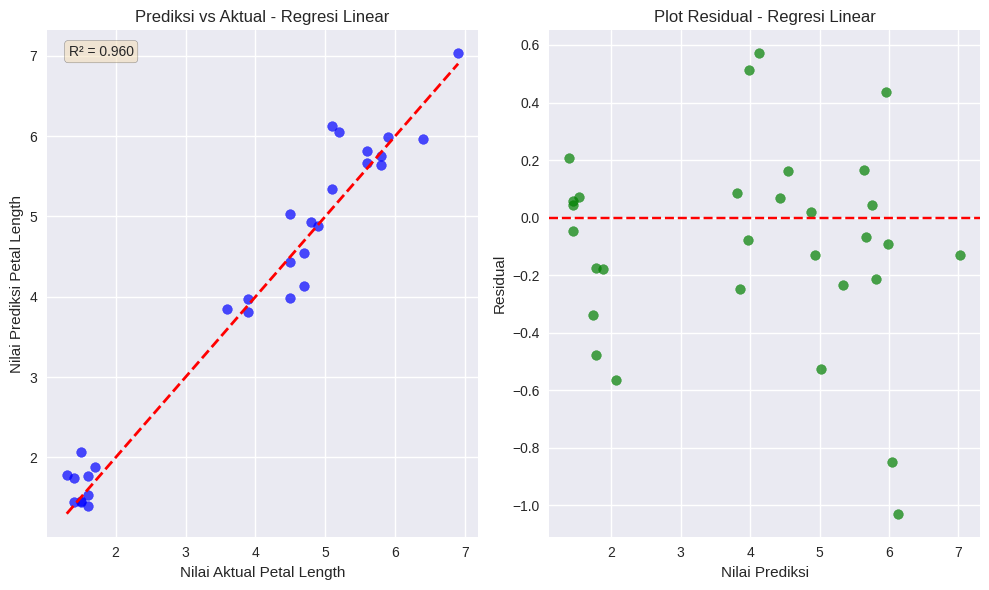

In [18]:
# Visualisasi hasil regresi linear
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot prediksi vs aktual
axes[0].scatter(y_test_lin, y_pred_lin, alpha=0.7, color='blue')
axes[0].plot([y_test_lin.min(), y_test_lin.max()],
             [y_test_lin.min(), y_test_lin.max()], 'r--', lw=2)
axes[0].set_xlabel('Nilai Aktual Petal Length')
axes[0].set_ylabel('Nilai Prediksi Petal Length')
axes[0].set_title('Prediksi vs Aktual - Regresi Linear')
axes[0].text(0.05, 0.95, f'R² = {r2_lin:.3f}', transform=axes[0].transAxes,
             bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.5))

# Residual plot
residuals = y_test_lin - y_pred_lin
axes[1].scatter(y_pred_lin, residuals, alpha=0.7, color='green')
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Nilai Prediksi')
axes[1].set_ylabel('Residual')
axes[1].set_title('Plot Residual - Regresi Linear')

plt.tight_layout()
plt.show()